**Installing dependences**

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0
!pip install -r requirements.txt  # install
!pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Cloning into 'yolov5'...
remote: Enumerating objects: 15305, done.
remote: Total 15305 (delta 0), reused 0 (delta 0), pack-reused 15305
Receiving objects: 100% (15305/15305), 14.19 MiB | 16.70 MiB/s, done.
Resolving deltas: 100% (10500/10500), done.
/content/yolov5
HEAD is now at 064365d Update parse_opt() in export.py to work as in train.py (#10789)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 472.9 kB/s

*Setting env for dataset directory*

In [2]:
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [3]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="roboflow-yolov5")

RuntimeError: ignored

*Roboflow authorization and api keys*

In [4]:
# rf = Roboflow(api_key="your api key")
# project = rf.workspace("cv-glh01").project("hard-hat-woi1m")
# dataset = project.version(1).download("yolov5")
rf = Roboflow(api_key=">>> Your api key from roboflow")
project = rf.workspace("manuel-wilson").project("industrial-safety-helmet")
dataset = project.version(2).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/industrial-safety-helmet-2 in yolov5pytorch:: 100%|██████████| 2112/2112 [00:00<00:00, 3078.02it/s]


**TRAINING THE MODEL**

In [5]:
# {dataset.location}
# Training the yolo detector
!python train.py --img 640 --batch 16 --epochs 100 --data {dataset.location}/data.yaml  --weights yolov5s.pt --cache
# python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=/content/datasets/industrial-safety-helmet-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 48 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v7.0-72-g064365d Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cl

**Tensor boar Visualization**

In [6]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
%tensorboard --logdir runs

ModuleNotFoundError: ignored

GROUND TRUTH TRAINING DATA:


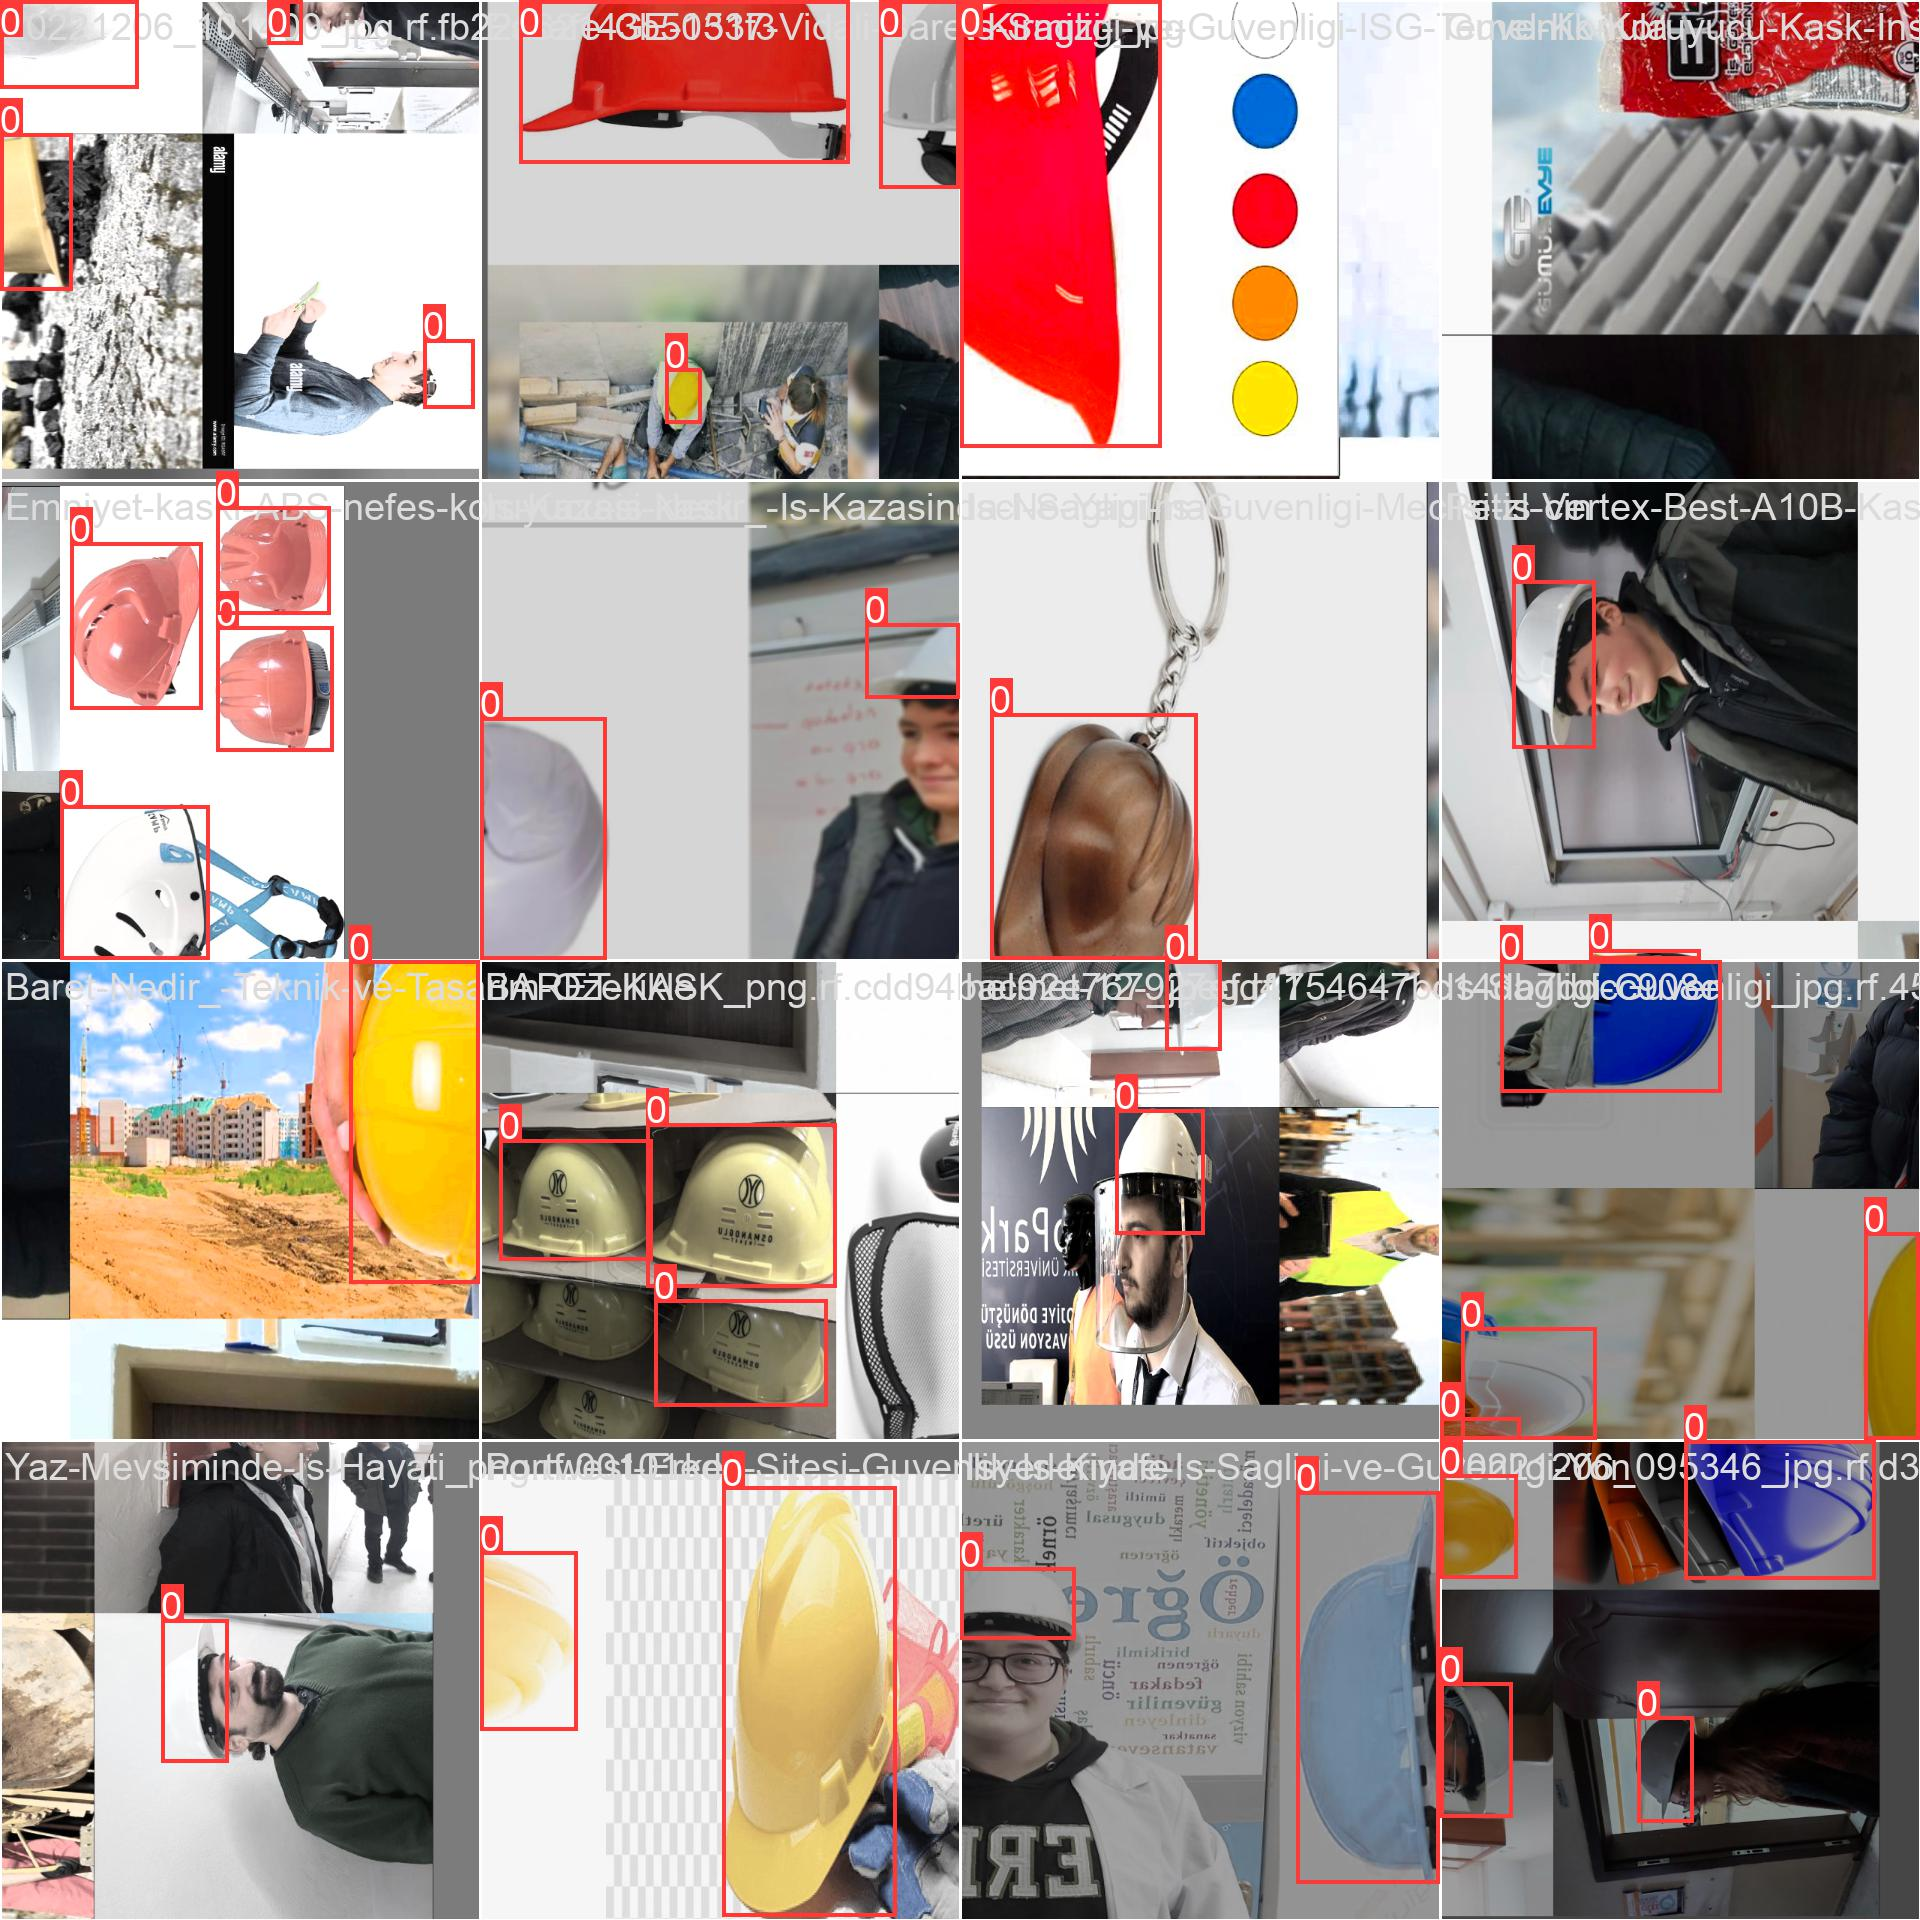

In [11]:
# first, display our ground truth data
# selecting the batch
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/exp/train_batch1.jpg', width=900)

**Loading the prediction script and using the model**

In [8]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.3 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/industrial-safety-helmet-2/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /content/datasets/industrial-safety-helmet-2/test/images/Is-Elbiseleri-Is-Ayakkabilari-Is-1-_jpg.rf.379896c3ef54201fa4b756e41110c5f8.jpg: 640x640 2 industrial-safety-helmets, 12.6ms
image 2/8 /content/datasets/industrial-safety-helmet-2/test/images/helmet-19-_jpg.rf.7d22c86b7386272d6d9a3ec3513d7900.j

***Testing couple of images***

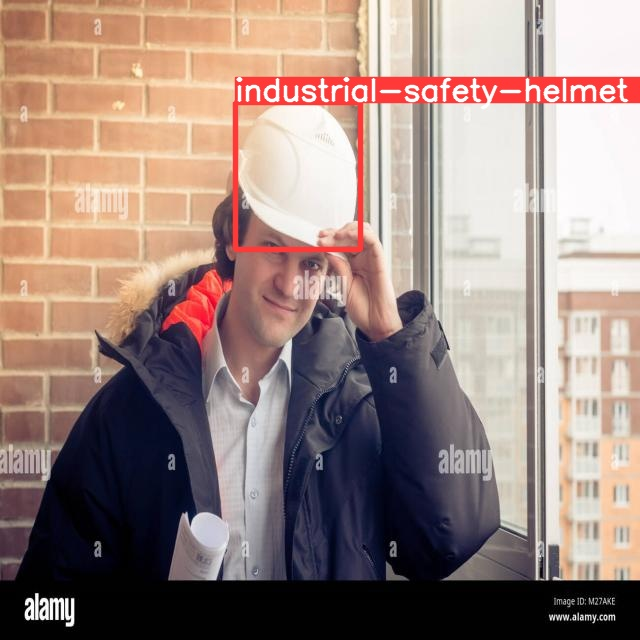

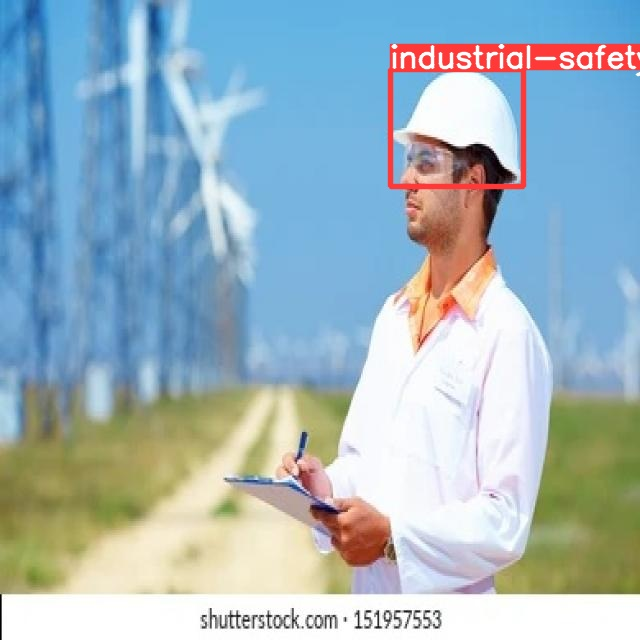

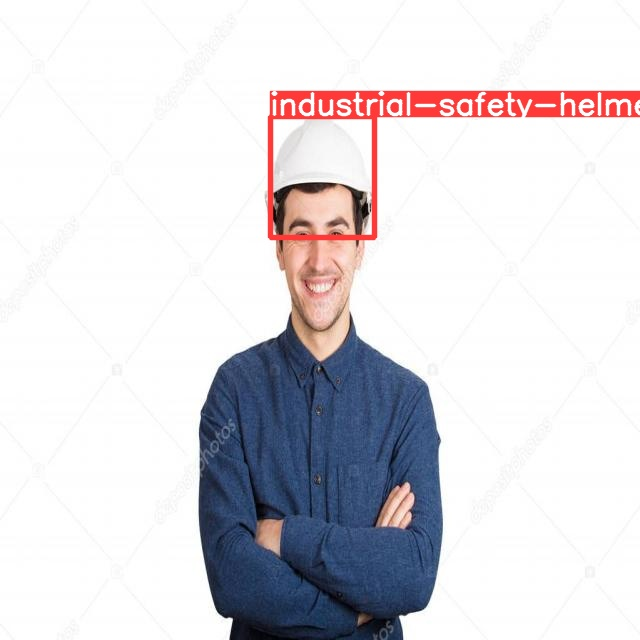

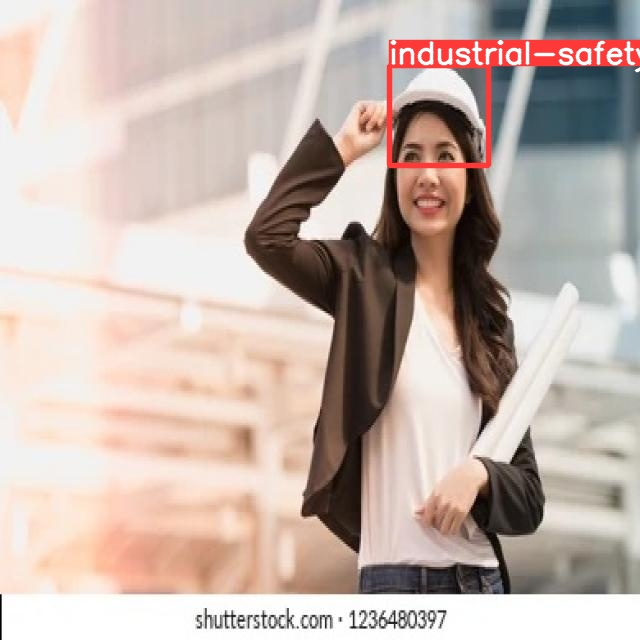

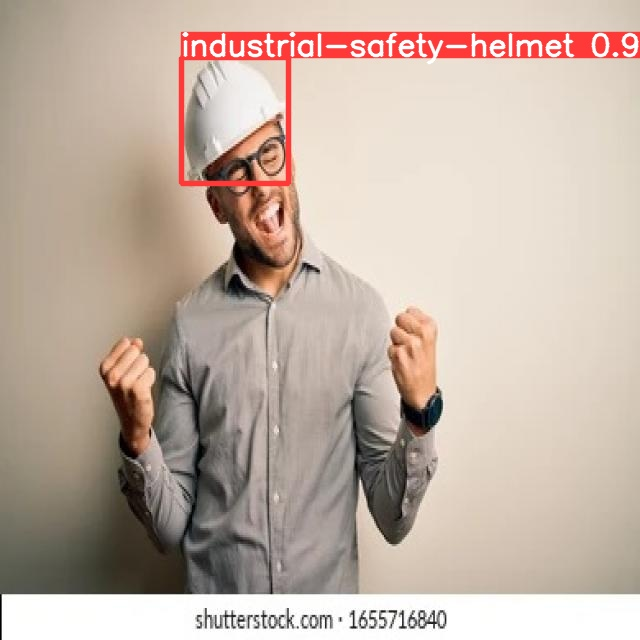

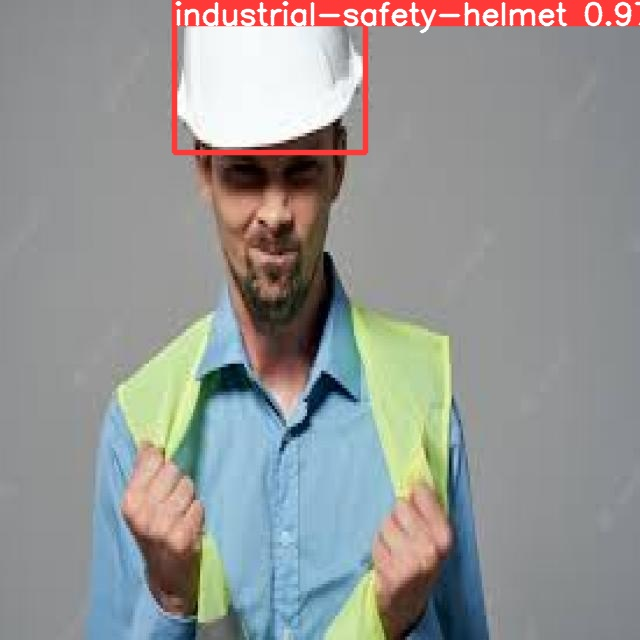

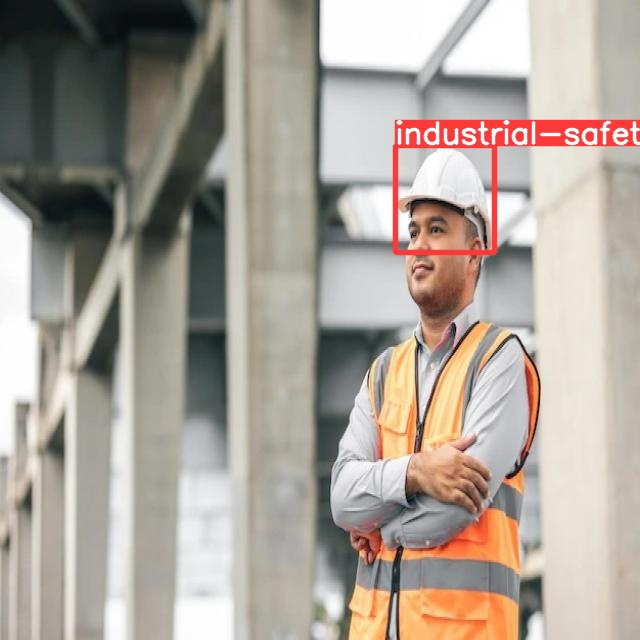

In [9]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display
i = 0;
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    i+=1
    # passing the number of images found from the tested inferencences
    if i<8:
      display(Image(filename=imageName))
      print("\n")

**SAVING THE MODEL**

In [10]:
# download the weights and insert in the model
from google.colab import files
files.download("./runs/train/exp/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>